## Testing Color Spaces
https://realpython.com/python-opencv-color-spaces/

In [48]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import colorsys

In [49]:
imageNames = [
    "5436e3c6bae478396759f233.jpg",
    "5aaf1253116597691362835b.jpg",
    "5aaf12ba116597691362b671.jpg",
    "5aaf13841165976913631d42.jpg"
]

def readAndConvert(image):
    im = cv2.imread(image)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

images = [readAndConvert(image)for image in imageNames]

colorSpaceCount = 6

RGB = "RGB"
HSV = "HSV"
LUV = "LUV"
LUV_INVERTED = "LUV_INVERTED"
XYZ = "XYZ"
# "YUV": cv2.cvtColor(im_luv, cv2.COLOR_RGB2YUV),
HSL = "HSL"
# GRAY = "GRAY"

def getImageSpaces(im_RGB):
    return {
        RGB: im_RGB,
        HSV: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HSV),
        LUV: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2LUV),
        LUV_INVERTED: cv2.bitwise_not(cv2.cvtColor(im_RGB, cv2.COLOR_RGB2LUV)),
        XYZ: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2XYZ),
        # "YUV": cv2.cvtColor(im_luv, cv2.COLOR_RGB2YUV),
        HSL: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HLS)
#         GRAY: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2GRAY)
    }

def getSpaceLabels(space):
    if space is RGB:
        return ["Red", "Green", "Blue"]
    elif space is HSV:
        return ["Hue", "Saturation", "Value"]
    else:
        return ["x_label", "y_label", "z_label"]


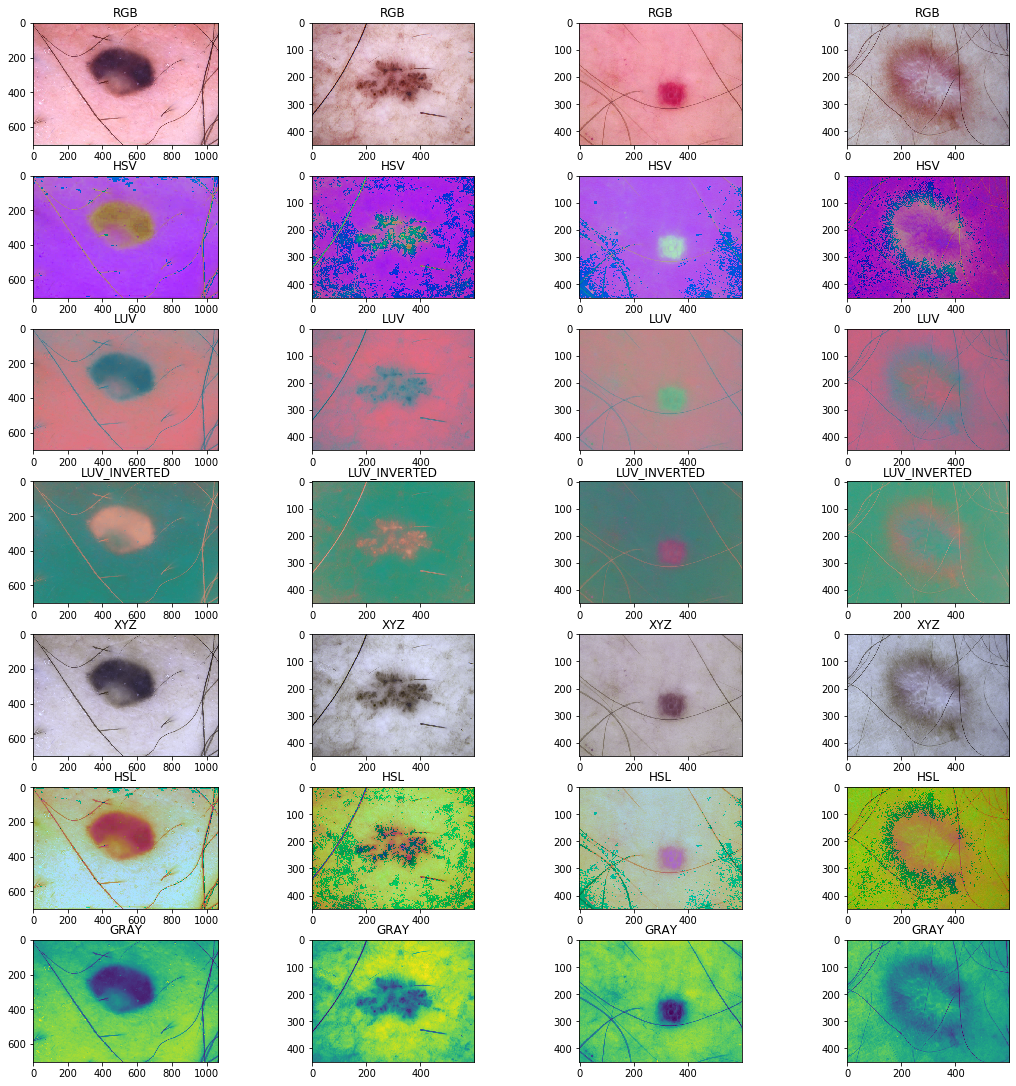

In [20]:
fig, axs = plt.subplots(colorSpaceCount, len(imageNames), figsize=(15,15))
# fig.suptitle('Color Spaces')
fig.tight_layout(pad=1.0)

for i in range(len(images)):
    im = cv2.imread(images[i])
    im_RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    imageSpaces = getImageSpaces(im_RGB)
    
    j = 0
    for key, value in imageSpaces.items():
        axs[j, i].set_title(key)
        axs[j, i].imshow(value)
        j = j +1


## Color Visualization

In [50]:
# Parameters: image converted to desired color space
def getPixelColors(im):
    pixel_colors = im.reshape((np.shape(im)[0]*np.shape(im)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    return pixel_colors

In [51]:
# Parameters: 
    # im: image in desired color space
    # pixel_colors: colors to be displayed on graph
    # labels: ["xlabel", "ylabel", "zlabel"]
def graphColorSpace(im, pixel_colors, labels, title = ""):
    x, y, z = cv2.split(im)
    fig = plt.figure()
    fig.label = title
    axis = fig.add_subplot(1, 1, 1, projection="3d", title=title)

    axis.scatter(x.flatten(), y.flatten(), z.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel(labels[0])
    axis.set_ylabel(labels[1])
    axis.set_zlabel(labels[2])
    plt.show()
#     return fig

In [52]:
def visualizeColorSpace(im_RGB, space, color):
    imageSpaces = getImageSpaces(im_RGB)
    
    im = imageSpaces[space]
    pixel_colors = getPixelColors(imageSpaces[color])
    labels = getSpaceLabels(space)
            
    graphColorSpace(im, pixel_colors, labels, "Position: " + space + " Color: " + color)
        

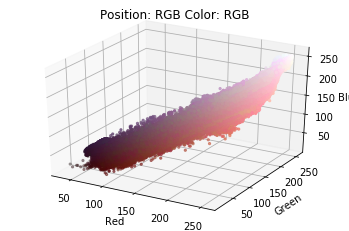

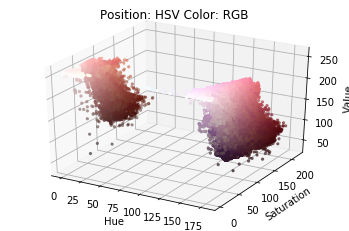

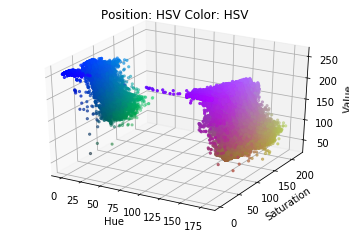

In [7]:
im2 = cv2.imread(imageNames[0])
im_RGB2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
visualizeColorSpace(im_RGB2, RGB, RGB)
visualizeColorSpace(im_RGB2, HSV, RGB)
visualizeColorSpace(im_RGB2, HSV, HSV)

In [42]:
# fig, axs = plt.subplots(colorSpaceCount, len(imageNames), figsize=(30,30))
# # fig.suptitle('Color Spaces')
# fig.tight_layout(pad=1.0)

# for i in range(len(imageNames)):
#     im_RGB = images[i]
#     imageSpaces = getImageSpaces(im_RGB)
    
#     j = 0
#     for key, value in imageSpaces.items():
#         axs[j, i].imshow(visualizeColorSpace(im_RGB, key, RGB))
#         j = j +1

# for i in range(len(imageNames)):
#     im_RGB = images[i]
#     imageSpaces = getImageSpaces(im_RGB)
    
#     j = 0
#     for key, value in imageSpaces.items():
#         axs[j, i].imshow(value)
#         j = j +1

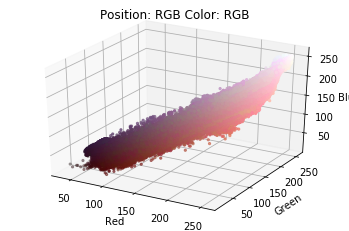

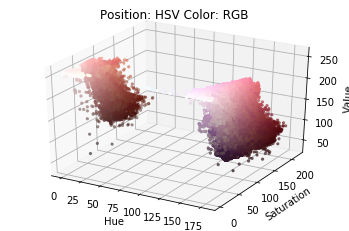

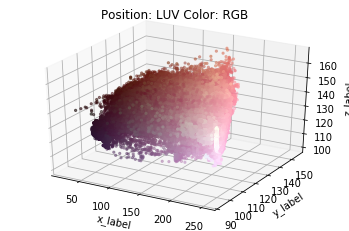

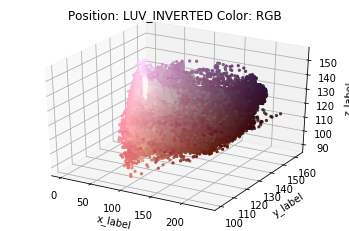

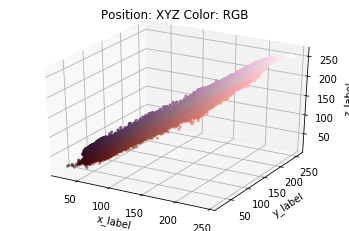

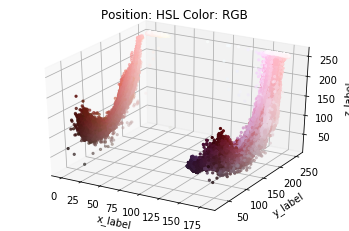

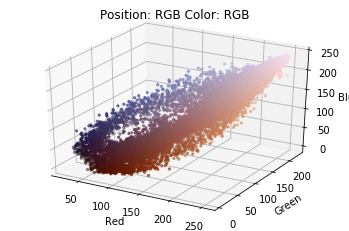

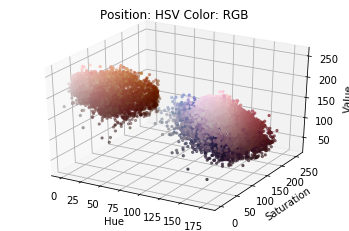

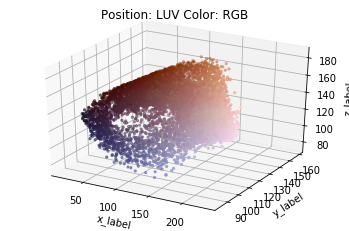

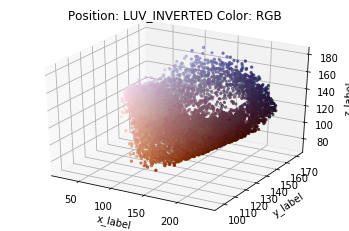

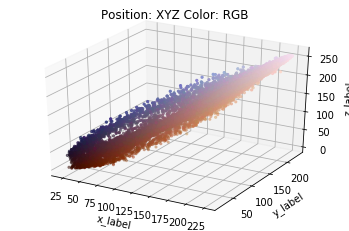

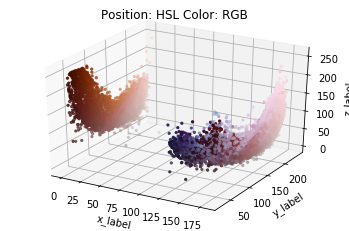

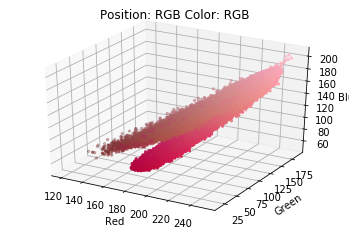

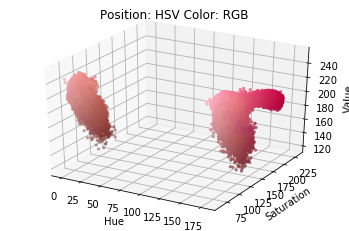

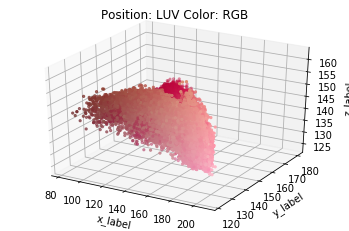

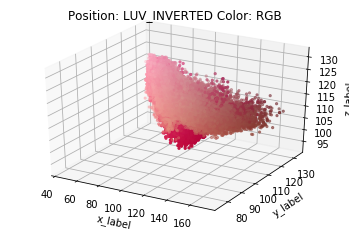

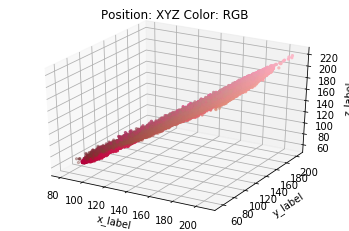

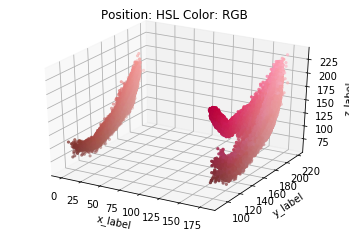

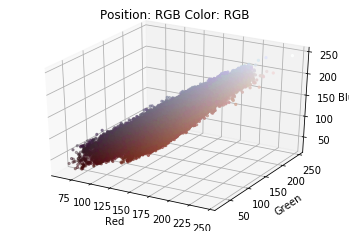

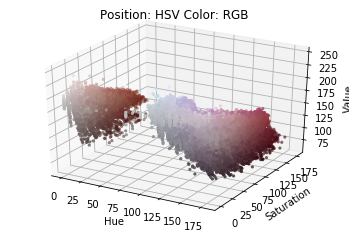

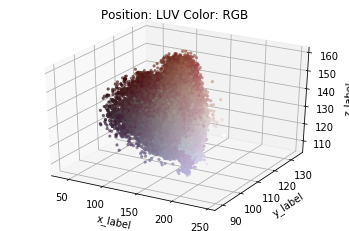

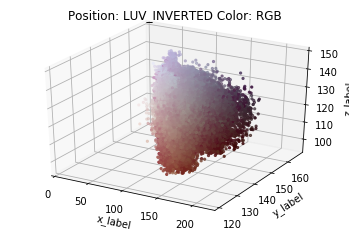

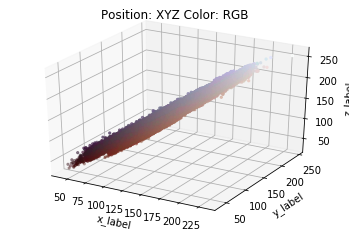

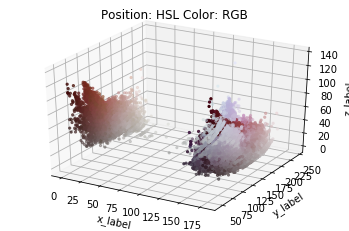

In [45]:
for i in range(len(imageNames)):
    im_RGB = images[i]
    imageSpaces = getImageSpaces(im_RGB)
    
    j = 0
    for key, value in imageSpaces.items():
        visualizeColorSpace(im_RGB, key, RGB)


# Color Masking

In [7]:
def stupid_rgb_to_hsv_to_rgb_conversion(rgbColors):
    blah = colorsys.rgb_to_hsv(rgbColors[0], rgbColors[1], rgbColors[2])
    blah2 = colorsys.hsv_to_rgb(blah[0], blah[1], blah[2])
#     print("rgb to hsv", blah)
#     print("hsv to rgb", blah2)
    return blah2

In [8]:
def showSquares(light, dark):
    lo_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
    do_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0

    fig2, axs = plt.subplots(1,2)
    fig2.suptitle('Colors')

    axs[0].set_title('Light')
    axs[0].imshow(lo_square)

    axs[1].set_title('Dark')
    axs[1].imshow(do_square)

In [9]:
def showSquaresHSV2RGB(light, dark):
    lo_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
    do_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0

    fig2, axs = plt.subplots(1,2)
    fig2.suptitle('Colors')

    axs[0].set_title('Light')
    axs[0].imshow(hsv_to_rgb(lo_square))

    axs[1].set_title('Dark')
    axs[1].imshow(hsv_to_rgb(do_square))    

In [ ]:
# inputImage = cv2.imread("5aaf12ba116597691362b671.jpg")
# inputImageGray = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(inputImageGray,150,200,apertureSize = 3)
# minLineLength = 30
# maxLineGap = 5
# lines = cv2.HoughLinesP(edges,cv2.HOUGH_PROBABILISTIC, np.pi/180, 30, minLineLength,maxLineGap)
# for x in range(0, len(lines)):
#     for x1,y1,x2,y2 in lines[x]:
#         #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
#         pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
#         cv2.polylines(inputImage, [pts], True, (0,255,0))

# font = cv2.FONT_HERSHEY_SIMPLEX
# cv2.putText(inputImage,"Tracks Detected", (500, 250), font, 0.5, 255)
# cv2.imshow("Trolley_Problem_Result", inputImage)
# cv2.imshow('edge', edges)

In [17]:
def createMask(im_RGB, maskSpace, light_rgb, dark_rgb):
#     im_RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    imageSpaces = getImageSpaces(im_RGB)
    
    light_hsv = stupid_rgb_to_hsv_to_rgb_conversion(light_rgb)
    dark_hsv = stupid_rgb_to_hsv_to_rgb_conversion(dark_rgb)
    
    showSquares(light_hsv, dark_hsv)
    showSquaresHSV2RGB(light_hsv, dark_hsv)
    
    mask = cv2.inRange(imageSpaces[maskSpace], light_hsv, dark_hsv)
    result = cv2.bitwise_and(im_RGB, im_RGB, mask=mask)
    plt.subplot(1, 2, 1)
    plt.imshow(mask)
    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.show()

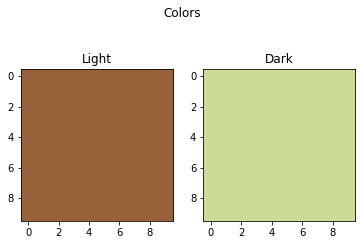

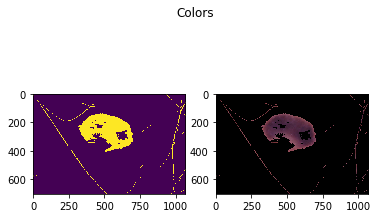

In [25]:
createMask(images[0], HSV, (153,99,58), (203,220,150))